In [13]:
import pandas as pd

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [15]:
import os

In [16]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Python BI'

In [18]:
os.chdir(r"C:/Users/user/Desktop/Python BI/HR Analytics")

In [19]:
hr_train=pd.read_csv("train_hr.csv")

In [20]:
hr_test=pd.read_csv("test_hr.csv")

In [21]:
hra=hr_test.append(hr_train)

In [22]:
hra

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0.0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0.0


In [23]:
hra.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [24]:
hra.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [25]:
hra.shape

(78298, 14)

In [26]:
(hra.isnull().sum()/hra.shape[0])*100

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [27]:
hra.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


# univariate Analysis

In [28]:
hra["department"].value_counts(normalize=True)*100

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64

In [29]:
hra["region"].value_counts(normalize=True)*100

region_2     22.531865
region_22    11.707834
region_7      8.716698
region_15     5.029503
region_13     4.872411
region_26     4.177629
region_31     3.549261
region_4      3.164832
region_27     3.025620
region_16     2.624588
region_28     2.443230
region_11     2.408746
region_23     2.159698
region_29     1.798258
region_32     1.759943
region_19     1.639889
region_14     1.503231
region_20     1.501954
region_17     1.477688
region_25     1.476411
region_5      1.415106
region_6      1.261846
region_30     1.187770
region_8      1.180107
region_10     1.171167
region_1      1.083042
region_24     0.928504
region_12     0.913178
region_9      0.766303
region_21     0.753531
region_3      0.629646
region_34     0.570896
region_33     0.504483
region_18     0.065136
Name: region, dtype: float64

In [30]:
hra["education"].value_counts(normalize=True)*100

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [31]:
hra["gender"].value_counts(normalize=True)*100

m    70.36195
f    29.63805
Name: gender, dtype: float64

In [32]:
hra["recruitment_channel"].value_counts(normalize=True)*100

other       55.587627
sourcing    42.377839
referred     2.034535
Name: recruitment_channel, dtype: float64

In [33]:
hra["no_of_trainings"].value_counts(normalize=True)*100

1     80.852640
2     14.727068
3      3.232522
4      0.840379
5      0.209456
6      0.086848
7      0.026821
8      0.008940
9      0.008940
10     0.006386
Name: no_of_trainings, dtype: float64

In [34]:
hra["KPIs_met >80%"].value_counts(normalize=True)*100

0    64.596797
1    35.403203
Name: KPIs_met >80%, dtype: float64

In [35]:
hra["previous_year_rating"].value_counts(normalize=True)*100

3.0    36.675327
5.0    23.269119
4.0    19.521296
1.0    12.303419
2.0     8.230839
Name: previous_year_rating, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

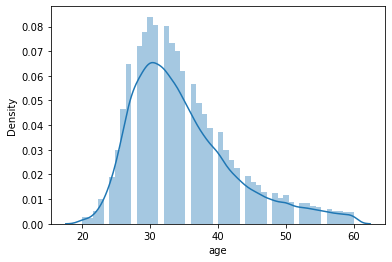

In [36]:
sns.distplot(hra["age"])

In [37]:
hra["length_of_service"].value_counts(normalize=True)*100

3     12.856012
4     12.448594
2     12.202100
5     10.758896
7     10.083272
6      8.649008
1      8.351427
8      5.295154
9      4.724259
10     4.002657
11     1.619454
12     1.432987
13     1.223531
15     1.063884
14     1.034509
16     0.970651
17     0.812281
18     0.712662
19     0.601548
20     0.242663
21     0.136657
23     0.122608
22     0.112391
24     0.112391
25     0.095788
26     0.070244
27     0.066413
28     0.053641
29     0.051087
31     0.034484
30     0.022989
32     0.014049
33     0.012772
34     0.007663
37     0.001277
Name: length_of_service, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

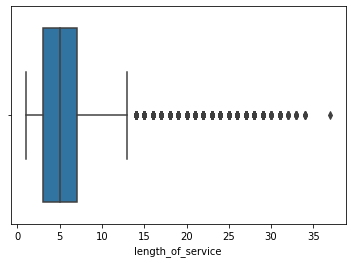

In [38]:
sns.boxplot(hra["length_of_service"])

##Outliers Treatment For length_of_service

### 3-SD Rule

In [39]:
m=np.mean(hra["length_of_service"])
std=np.std(hra["length_of_service"])

In [40]:
SD3=m+3*std

In [41]:
SD3

18.593101833931314

In [42]:
hra[hra["length_of_service"]>SD3]["length_of_service"].count()

1377

In [43]:
hra[hra["length_of_service"]>SD3]["length_of_service"].count()/hra.shape[0]*100

1.7586656108712868

# percentile method

In [44]:
p=np.percentile(hra["length_of_service"],99.5)

In [45]:
p

24.0

In [46]:
p=(hra[hra["length_of_service"]>p]["length_of_service"].count()/hra.shape[0])*100


In [47]:
p

0.4304069069452604

In [48]:
hra["length_of_service_99"]=np.where(hra["length_of_service"]>p,p,hra["length_of_service"])
hra["length_of_service_99"]

0        0.430407
1        0.430407
2        0.430407
3        0.430407
4        0.430407
           ...   
54803    0.430407
54804    0.430407
54805    0.430407
54806    0.430407
54807    0.430407
Name: length_of_service_99, Length: 78298, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score'>

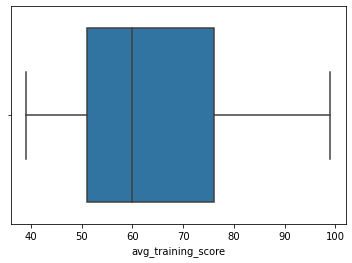

In [49]:
sns.boxplot(hra['avg_training_score'])

In [50]:
hra["awards_won?"].value_counts(normalize=True)*100

0    97.694705
1     2.305295
Name: awards_won?, dtype: float64

# Bi-variate Anyalysis

In [51]:
ser_plot=hra.pivot_table(index="length_of_service",values="is_promoted", aggfunc=np.mean)
ser_plot

,is_promoted
length_of_service,
1,0.082912
2,0.089019
3,0.086592
4,0.087478
5,0.081447
6,0.084706
7,0.083589
8,0.093306
9,0.087105


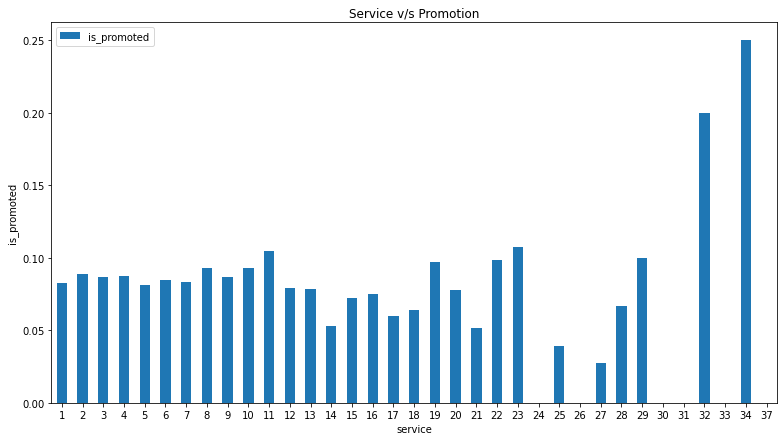

In [52]:
ser_plot.plot(kind="bar" , figsize=(13,7))
plt.xlabel("service")
plt.ylabel("is_promoted")
plt.title("Service v/s Promotion")
plt.xticks(rotation=0)
plt.show()

In [53]:
hra.length_of_service.describe()

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [54]:
hra["Length_Bucket"]=np.where(hra.length_of_service<=5,"1_0-5 Yrs",
                             np.where(hra.length_of_service>7,"3_Above 7 Yrs","2_5-7 Yrs"))

In [55]:
pd.DataFrame(hra.Length_Bucket.value_counts())

,Length_Bucket
1_0-5 Yrs,44330
3_Above 7 Yrs,19301
2_5-7 Yrs,14667


In [56]:
hra.groupby("Length_Bucket")

In [57]:
print(hra[hra["Length_Bucket"]=="1_0-5 Yrs"]["is_promoted"].sum())
print(hra[hra["Length_Bucket"]=="2_5-7 Yrs"]["is_promoted"].sum())
print(hra[hra["Length_Bucket"]=="3_Above 7 Yrs"]["is_promoted"].sum())

2654.0
865.0
1149.0


In [58]:
hra.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [59]:
hra.education.value_counts(normalize=True)*100

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [60]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  length_of_service_99  78298 non-null  float64
 15  Length_Bucket      

In [61]:
hra["education"]=hra["education"].fillna(hra["education"].mode()[0])
hra["education"].isnull().sum()

0

In [62]:
hra.education.isnull().sum()

0

In [63]:
hra.previous_year_rating.isnull().sum()

5936

In [64]:
hra.previous_year_rating.value_counts(normalize=True)*100

3.0    36.675327
5.0    23.269119
4.0    19.521296
1.0    12.303419
2.0     8.230839
Name: previous_year_rating, dtype: float64

In [65]:
hra["previous_year_rating"]=hra["previous_year_rating"].fillna(hra["previous_year_rating"].mode()[0])
hra["previous_year_rating"].isnull().sum()

0

In [66]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  length_of_service_99  78298 non-null  float64
 15  Length_Bucket      

# Model Building

In [67]:
hra1= hra.copy()

In [68]:
Y=hra1["is_promoted"]

In [69]:
X=hra1.drop(["is_promoted"], axis = 1)

In [70]:
X

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,length_of_service_99,Length_Bucket
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,0.430407,1_0-5 Yrs
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.430407,1_0-5 Yrs
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.430407,1_0-5 Yrs
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.430407,3_Above 7 Yrs
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.430407,2_5-7 Yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.430407,3_Above 7 Yrs
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0.430407,2_5-7 Yrs
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.430407,1_0-5 Yrs
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0.430407,1_0-5 Yrs


In [73]:
hra1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,length_of_service_99,Length_Bucket
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,NaN,0.430407,1_0-5 Yrs
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN,0.430407,1_0-5 Yrs
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN,0.430407,1_0-5 Yrs
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN,0.430407,3_Above 7 Yrs
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN,0.430407,2_5-7 Yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.0,0.430407,3_Above 7 Yrs
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0.0,0.430407,2_5-7 Yrs
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.0,0.430407,1_0-5 Yrs
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0.0,0.430407,1_0-5 Yrs


In [75]:
hra1.drop(["region", "employee_id","recruitment_channel",  "length_of_service_99"] , axis = 1, inplace=True)

In [76]:
hra.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,length_of_service_99,Length_Bucket
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,NaN,0.430407,1_0-5 Yrs
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN,0.430407,1_0-5 Yrs
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN,0.430407,1_0-5 Yrs
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN,0.430407,3_Above 7 Yrs
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN,0.430407,2_5-7 Yrs


# define dummies

In [77]:
hra2 = pd.get_dummies(hra1, drop_first=True)

In [78]:
hra2.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,Length_Bucket_2_5-7 Yrs,Length_Bucket_3_Above 7 Yrs
0,1,24,3.0,1,1,0,77,NaN,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,31,3.0,5,0,0,51,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,NaN,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,NaN,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,30,4.0,7,0,0,61,NaN,1,0,...,0,0,0,0,0,0,0,1,1,0


In [79]:
x=hra2.drop(["is_promoted"], axis = 1)

In [80]:
x.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,Length_Bucket_2_5-7 Yrs,Length_Bucket_3_Above 7 Yrs
0,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,31,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,30,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0,1,1,0


In [81]:
Y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: is_promoted, dtype: float64

# Logistic Regression

In [82]:
train=hra2[hra2.is_promoted.notnull()]
test=hra2[hra2.is_promoted.isnull()]

In [83]:
train.shape,test.shape

((54808, 21), (23490, 21))

In [84]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
model = LR.fit(train.drop("is_promoted",axis=1), train.is_promoted)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
pred=model.predict(test.drop("is_promoted",axis=1))

In [86]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
pd.concat([hr_test.employee_id,pd.DataFrame(pred)],axis=1).to_csv("prediction1.csv",index=False)


# Model 2 Decision tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(train.drop("is_promoted",axis=1), train.is_promoted)






DecisionTreeClassifier()

In [90]:
pred=classifier.predict(test.drop("is_promoted",axis=1))

In [93]:
dz=pd.concat([hr_test.employee_id,pd.DataFrame({"is_promoted":pred})],axis=1)

In [95]:
dz["is_promoted"]=dz["is_promoted"].apply(lambda x:int(x))

In [98]:
dz.to_csv("prediction_DT.csv",index=False)

In [99]:
dz.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [100]:
dz.is_promoted.value_counts()

0    21451
1     2039
Name: is_promoted, dtype: int64

# model 3 Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=80, random_state=0)
regressor.fit(train.drop("is_promoted",axis=1), train.is_promoted)

RandomForestClassifier(n_estimators=80, random_state=0)

In [149]:
pred=regressor.predict(test.drop("is_promoted",axis=1))

In [150]:
dz1=pd.concat([hr_test.employee_id,pd.DataFrame({"is_promoted":pred})],axis=1)

In [151]:
dz1["is_promoted"]=dz1["is_promoted"].apply(lambda x:int(x))

In [152]:
dz1.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [154]:
dz1.is_promoted.value_counts()

0    22469
1     1021
Name: is_promoted, dtype: int64

In [153]:
dz1.to_csv("prediction_RF.csv",index=False)